In [26]:
import rasters as rt
import numpy as np
from ECOSTRESS_colors import ALBEDO_COLORMAP, NDVI_COLORMAP, ET_COLORMAP
from STIC import STIC, calculate_G_SEBAL
from L3T_L4T_JET import downscale_air_temperature
from GEOS5FP import GEOS5FP
import logging
from datetime import datetime
from matplotlib import pyplot as plt
import cl

logger = logging.getLogger(__name__)

In [6]:
GEOS5FP_connection = GEOS5FP(working_directory="~/data/air_temperature_downscaling")

[2022-05-21 08:15:58 INFO] GEOS-5 FP working directory: /Users/halverso/data/air_temperature_downscaling
[2022-05-21 08:15:58 INFO] GEOS-5 FP download directory: /Users/halverso/data/air_temperature_downscaling/GEOS5FP_download
[2022-05-21 08:15:58 INFO] GEOS-5 FP products directory: /Users/halverso/data/air_temperature_downscaling/GEOS5FP_products


In [3]:
water_filename = "ECOv002_L2T_LSTE_15801_013_11SPS_20210419T215859_0700_01_water.tif"
water = rt.Raster.open(water_filename)
water

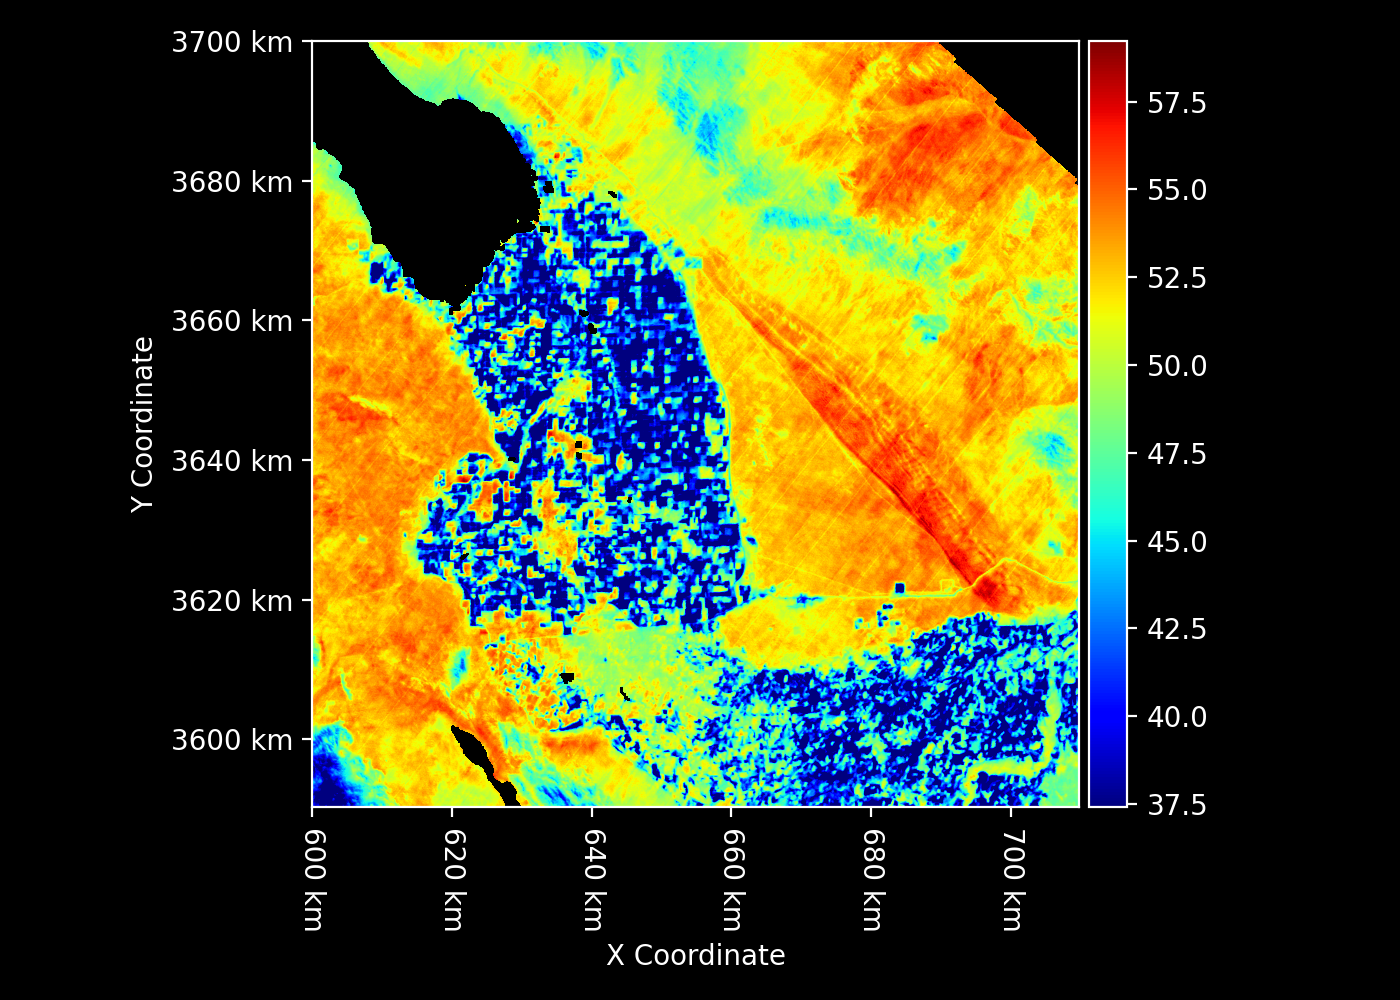

In [4]:
ST_filename = "ECOv002_L2T_LSTE_15801_013_11SPS_20210419T215859_0700_01_LST.tif"
ST_K = rt.Raster.open(ST_filename)
ST_C = ST_K - 273.15
ST_C = rt.where(water, np.nan, ST_C)
ST_C

In [5]:
geometry = ST_C.geometry
geometry


{
  "dimensions": {
    "rows": 1568,
    "cols": 1568
  },
  "bbox": {
    "xmin": 600000.0,
    "ymin": 3590260.0,
    "xmax": 709760.0,
    "ymax": 3700020.0
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 70.0,
    "cell_height": -70.0
  }
}

In [7]:
tile = ST_filename.split("_")[-5]
tile

'11SPS'

In [8]:
time_UTC = datetime.strptime(ST_filename.split("_")[-4], "%Y%m%dT%H%M%S")
time_UTC

datetime.datetime(2021, 4, 19, 21, 58, 59)

In [21]:
geometry.width / 8

13720.0

In [24]:
# Ta_K_global = GEOS5FP_connection.Ta_K(time_UTC=time_UTC)
# Ta_K_global

In [22]:
GEOS_IN_SENTINEL_COARSE_CELL_SIZE = 13720
coarse_geometry = geometry.rescale(GEOS_IN_SENTINEL_COARSE_CELL_SIZE)
Ta_K_coarse = GEOS5FP_connection.Ta_K(time_UTC=time_UTC, geometry=coarse_geometry, resampling="cubic")
Ta_K_coarse

[2022-05-21 08:21:06 INFO] retrieving Ta from GEOS-5 FP tavg1_2d_slv_Nx T2M for 2021-04-19 21:58 UTC
[2022-05-21 08:21:06 INFO] searching GEOS-5 FP tavg1_2d_slv_Nx at 2021-04-19 21:58:59 UTC
[2022-05-21 08:21:07 INFO] GEOS-5 FP file found: /Users/halverso/data/air_temperature_downscaling/GEOS5FP_download/2021.04.19/GEOS.fp.asm.tavg1_2d_slv_Nx.20210419_2130.V01.nc4
[2022-05-21 08:21:07 INFO] GEOS-5 FP working directory: /Users/halverso/data/air_temperature_downscaling
[2022-05-21 08:21:07 INFO] GEOS-5 FP products directory: /Users/halverso/data/air_temperature_downscaling/GEOS5FP_products
[2022-05-21 08:21:07 INFO] GEOS-5 FP file found: /Users/halverso/data/air_temperature_downscaling/GEOS5FP_download/2021.04.19/GEOS.fp.asm.tavg1_2d_slv_Nx.20210419_2230.V01.nc4
[2022-05-21 08:21:07 INFO] GEOS-5 FP working directory: /Users/halverso/data/air_temperature_downscaling
[2022-05-21 08:21:07 INFO] GEOS-5 FP products directory: /Users/halverso/data/air_temperature_downscaling/GEOS5FP_products
[

In [25]:
# Ta_C_smooth = GEOS5FP_connection.Ta_C(time_UTC=time_UTC, geometry=geometry, resampling="cubic")
# Ta_C_smooth

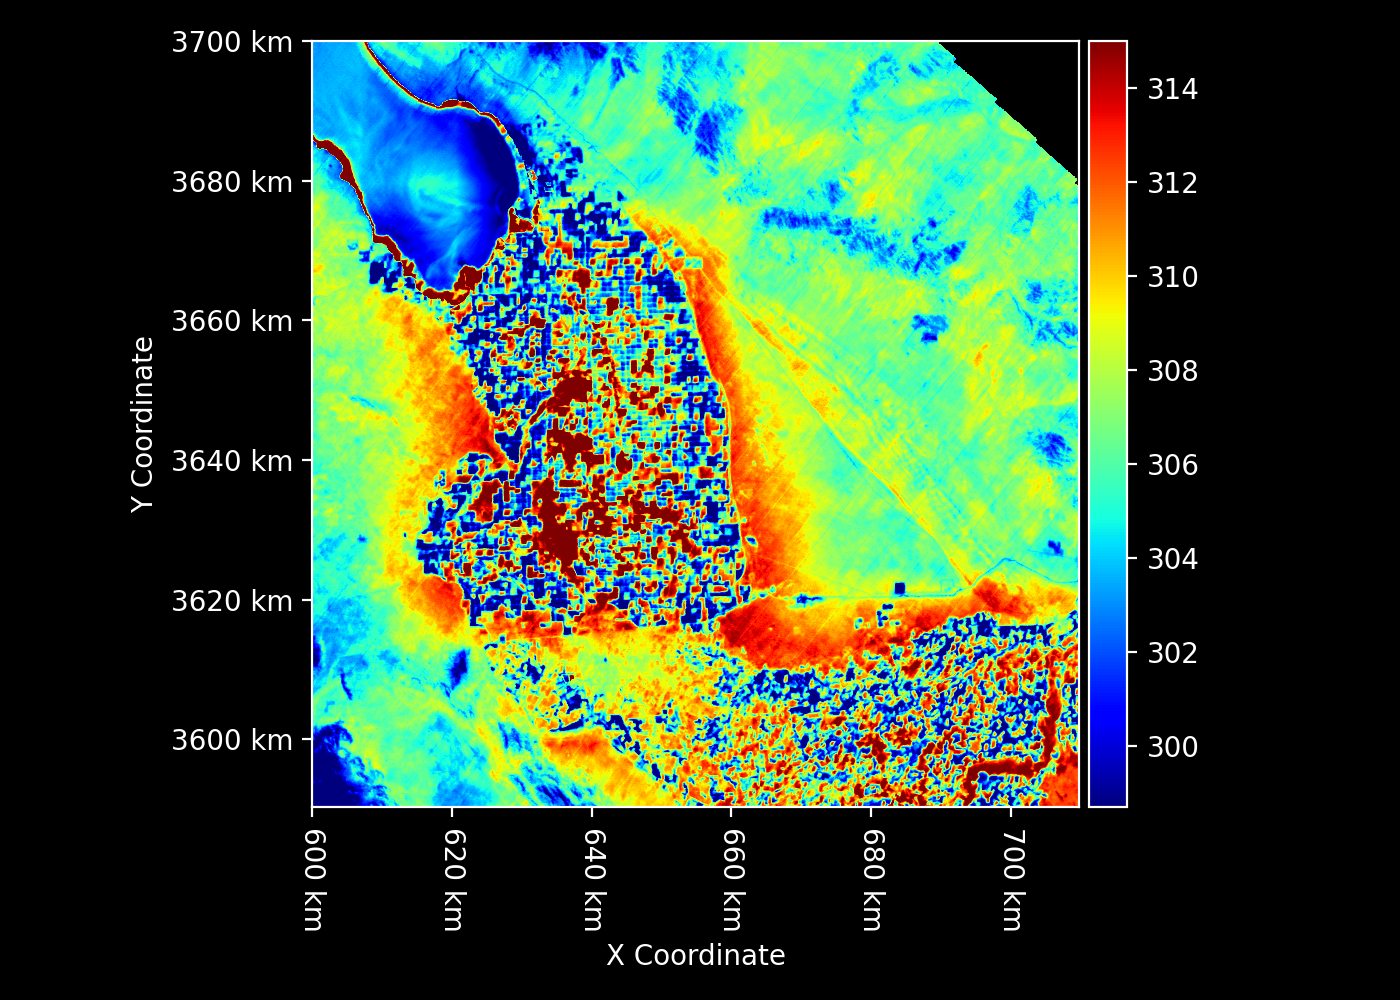

In [27]:
Ta_K = downscale_air_temperature(
    time_UTC=time_UTC,
    Ta_K_coarse=Ta_K_coarse,
    ST_K=ST_K,
    water=water,
    fine_geometry=geometry,
    coarse_geometry=coarse_geometry
)

Ta_K

In [ ]:
albedo_filename = "ECOv002_L2T_STARS_15801_013_11SPS_20210419_0700_01_albedo.tif"
albedo = rt.Raster.open(albedo_filename, cmap=ALBEDO_COLORMAP)
albedo = rt.where(water, np.nan, albedo)
albedo

In [ ]:
NDVI_filename = "ECOv002_L2T_STARS_15801_013_11SPS_20210419_0700_01_NDVI.tif"
NDVI = rt.Raster.open(NDVI_filename, cmap=NDVI_COLORMAP)
NDVI = rt.where(water, np.nan, NDVI)
NDVI

In [ ]:
RH_filename = "ECOv002_L3T_MET_PT-JPL_15801_013_11SPS_20210419T215859_0700_01_RH.tif"
RH = rt.Raster.open(RH_filename)
RH = rt.where(water, np.nan, RH)
RH

In [ ]:
Ta_filename = "ECOv002_L3T_MET_PT-JPL_15801_013_11SPS_20210419T215859_0700_01_Ta.tif"
Ta_C = rt.Raster.open(Ta_filename)
Ta_C = rt.where(water, np.nan, Ta_C)
Ta_C

In [ ]:
Rn_filename = "ECOv002_L3T_SEB_PT-JPL_15801_013_11SPS_20210419T215859_0700_01_Rn.tif"
Rn = rt.Raster.open(Rn_filename)
Rn = rt.where(water, np.nan, Rn)
Rn

In [ ]:
G = calculate_G_SEBAL(Rn, ST_C, NDVI, albedo)
G

In [27]:
STIC_model = STIC(
    working_directory="~/data/STIC_testing",
    save_intermediate=True,
    show_distribution=True
)

STIC_results = STIC_model.STIC(
    geometry=geometry,
    target=tile,
    time_UTC=time_UTC,
    Rn=Rn,
    RH=RH,
    Ta_C=Ta_C_smooth,
    ST_C=ST_C,
    albedo=albedo,
    emissivity=emissivity,
    NDVI=NDVI,
    G=G,
    water=water,
    max_iterations=3
)

[2022-05-21 07:21:55 INFO] FLiES working directory: /Users/halverso/data/STIC_testing
[2022-05-21 07:21:55 INFO] connecting to SRTM
[2022-05-21 07:21:55 INFO] checking URL: https://e4ftl01.cr.usgs.gov
[2022-05-21 07:21:56 INFO] remote verified with status 200 in 0.92 seconds: https://e4ftl01.cr.usgs.gov
[2022-05-21 07:21:56 INFO] SRTM working directory: /Users/halverso/data/STIC_testing
[2022-05-21 07:21:56 INFO] SRTM download directory: /Users/halverso/data/STIC_testing/SRTM_download
[2022-05-21 07:21:56 INFO] connecting to GEOS-5 FP
[2022-05-21 07:21:56 INFO] GEOS-5 FP working directory: /Users/halverso/data/STIC_testing
[2022-05-21 07:21:56 INFO] GEOS-5 FP download directory: /Users/halverso/data/STIC_testing/GEOS5FP_download
[2022-05-21 07:21:56 INFO] GEOS-5 FP products directory: /Users/halverso/data/STIC_testing/GEOS5FP_products
[2022-05-21 07:21:56 INFO] FLiES intermediate directory: /Users/halverso/data/STIC_testing/STIC_intermediate
[2022-05-21 07:21:56 INFO] working directory

In [28]:
LE = STIC_results["LE"]
LE.cmap = ET_COLORMAP
LEt = STIC_results["LEt"]
LEt.cmap = ET_COLORMAP
PT = STIC_results["PT"]
PT.cmap = ET_COLORMAP
LE

In [ ]:
PT

In [ ]:
LEt

In [ ]:
plt.scatter(ST_C.ravel(), LE.ravel(), alpha=0.01)

In [ ]:
plt.scatter(ST_C.ravel(), LEt.ravel(), alpha=0.01)

In [ ]:
plt.scatter(ST_C.ravel(), PT.ravel(), alpha=0.01)

In [ ]:
LEt / PT

In [ ]:
plt.scatter(ST_C.ravel(), (LEt / PT).ravel(), alpha=0.01)